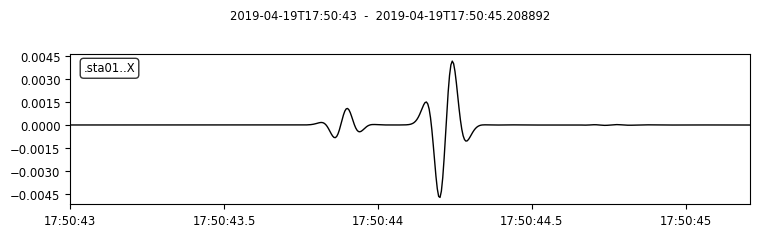

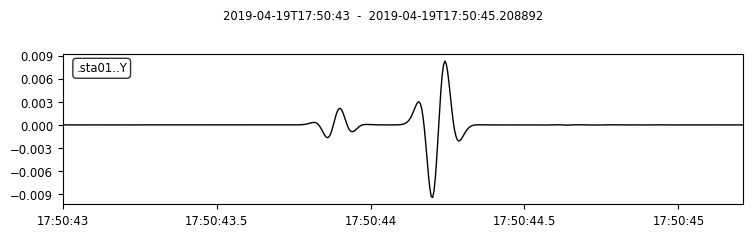

In [6]:
#reading files

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

import obspy
from obspy import read
#Rotational components of 1st station in x, y and z direction
st1_curlx = read('/home/ashah/Desktop/Apr16_3/sta01.curlx')
st1_curly = read('/home/ashah/Desktop/Apr16_3/sta01.curly')
st1_curlz = read('/home/ashah/Desktop/Apr16_3/sta01.curlz')

#Translation components of displacement in x, y and z direction
st1_x = read('/home/ashah/Desktop/Apr16_3/sta01.x')
st1_y = read('/home/ashah/Desktop/Apr16_3/sta01.y')
st1_z = read('/home/ashah/Desktop/Apr16_3/sta01.z')

#Translation components of acceleration in x, y and z direction
st1_xv = read('/home/ashah/Desktop/Apr16_3/sta01.xv')
st1_yv = read('/home/ashah/Desktop/Apr16_3/sta01.yv')
st1_zv = read('/home/ashah/Desktop/Apr16_3/sta01.zv')

st1_x.plot()
st1_y.plot()

Epicentral distance [m]:  1000078.0843194758
Theoretical azimuth [deg]:  0.0
Theoretical backazimuth [deg]:  180.0


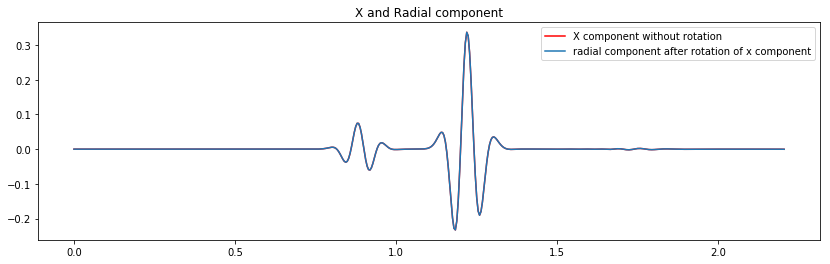

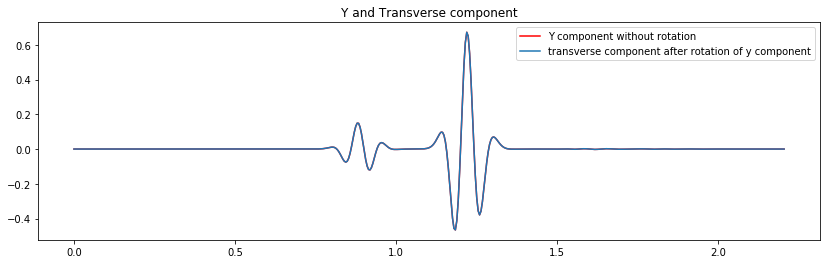

In [8]:
#transforming coordinates

from obspy.geodetics import gps2dist_azimuth
import obspy.signal.util as su

# Source position in geographic coordinate
lat_s = 0
long_s = 0

# Define the receiver position in Cartesian coordinate and convert it
#to geographic coordinate
dist_x = 500 # in km, the distance between receiver and source in x
#direction
dist_y = 1000 # in km, the distance between receiver and source in y
#direction
long_r, lat_r = su.util_lon_lat(long_s,lat_s, dist_x, dist_y)

# Backazimuth
baz = gps2dist_azimuth(lat_s, long_s, lat_r, lat_s)
print('Epicentral distance [m]: ', baz[0])
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])
st1_xv_copy1 = st1_xv.copy()
st1_yv_copy1 = st1_yv.copy()
st1_zv_copy1 = st1_zv.copy()
st1_radial     = st1_xv_copy1.rotate(method='NE->RT',back_azimuth=baz[2])
st1_transverse = st1_yv_copy1.rotate(method='NE->RT',back_azimuth=baz[2])
st1_vertical   = st1_zv_copy1.rotate(method='NE->RT',back_azimuth=baz[2])
fig = plt.figure(figsize=(14,4))
plt.plot(st1_xv[0].times(), st1_xv[0].data, color='r' , label='X component without rotation')
plt.plot(st1_radial[0].times(), st1_radial[0].data, label='radial component after rotation of x component')
plt.title('X and Radial component')
plt.legend()

fig = plt.figure(figsize=(14,4))
plt.plot(st1_yv[0].times(), st1_yv[0].data, color='r' , label='Y component without rotation')
plt.plot(st1_transverse[0].times(), st1_transverse[0].data, label='transverse component after rotation of y component')
plt.title('Y and Transverse component')
plt.legend()


